In [4]:
import pandas as pd
import numpy as np
import xlrd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
htrain = pd.read_csv('F:/DATA SCIENCE/PROJECT 1 HOUSE PRICES/train.csv')
htest = pd.read_csv('F:/DATA SCIENCE/PROJECT 1 HOUSE PRICES/test.csv')
#The above code loads Data File into the Jupyter.

In [6]:
htrain.columns
#Displays the details of columns in the train file

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
htrain.dtypes
#Displays which column has object and which one has integers

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [8]:
htrain.shape

(1460, 81)

In [9]:
htrain.head()
#Displays top 5 or 10 rows of the data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
h_train_num=htrain.select_dtypes(include=[np.number])
#Filters Numericals from the overall data

In [11]:
h_train_num.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [12]:
h_train_cat=htrain.select_dtypes(include=['object'])
#Filters Categorical/Words from the overall data

In [13]:
h_train_cat.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [14]:
h_train_num.describe().transpose()
#To describe the column statistics

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [15]:
for HC in h_train_num.columns:
    print (HC)
    print (h_train_num[HC].mean())
    print (h_train_num[HC].median())
    print('--------------------------------')
    
# Created a Data Frame 'HC'. Calculated mean and median of h_train_num and filled in HC
# in Ideal conditions, mean and medians are same in each case.

Id
730.5
730.5
--------------------------------
MSSubClass
56.897260273972606
50.0
--------------------------------
LotFrontage
70.04995836802665
69.0
--------------------------------
LotArea
10516.828082191782
9478.5
--------------------------------
OverallQual
6.0993150684931505
6.0
--------------------------------
OverallCond
5.575342465753424
5.0
--------------------------------
YearBuilt
1971.267808219178
1973.0
--------------------------------
YearRemodAdd
1984.8657534246574
1994.0
--------------------------------
MasVnrArea
103.68526170798899
0.0
--------------------------------
BsmtFinSF1
443.6397260273973
383.5
--------------------------------
BsmtFinSF2
46.54931506849315
0.0
--------------------------------
BsmtUnfSF
567.2404109589041
477.5
--------------------------------
TotalBsmtSF
1057.4294520547944
991.5
--------------------------------
1stFlrSF
1162.626712328767
1087.0
--------------------------------
2ndFlrSF
346.99246575342465
0.0
--------------------------------
LowQ

In [16]:
h_train_num_corr=h_train_num.corr()
# Finds out co-relation between the columns in the data

In [17]:
h_train_num_corr["SalePrice"]
# Gives the relation of Year Built wrt other columns

Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePr

In [18]:
h_train_num_corr[(h_train_num_corr["SalePrice"]>0.35) ]
# Gives the complete data of relationships which are greater than 0.4

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
TotalBsmtSF,-0.015415,-0.238518,0.392075,0.260833,0.537808,-0.171098,0.391452,0.291066,0.363936,0.522396,...,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.013196,-0.014969,0.613581
1stFlrSF,0.010496,-0.251758,0.457181,0.299475,0.476224,-0.144203,0.281986,0.240379,0.344501,0.445863,...,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.031372,-0.013604,0.605852
GrLivArea,0.008273,0.074853,0.402797,0.263116,0.593007,-0.079686,0.199010,0.287389,0.390857,0.208171,...,0.247433,0.330224,0.009113,0.020643,0.101510,0.170205,-0.002416,0.050240,-0.036526,0.708624
FullBath,0.005587,0.131608,0.198769,0.126031,0.550600,-0.194149,0.468271,0.439046,0.276833,0.058543,...,0.187703,0.259977,-0.115093,0.035353,-0.008106,0.049604,-0.014290,0.055872,-0.019669,0.560664


In [19]:
h_train_num_corr[(h_train_num_corr["SalePrice"]<-0.35) ]
# Gives the complete data of relationships which are less than 0.05 (its our wish), Usually it is between 0.3 to 0.6

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice


In [20]:
h_train_num_corr[(h_train_num_corr["SalePrice"]>0.35) ].index.values
# This gives the details of those columns which have the co-relation value between -1 to 0.35 and 0.35 to 1 

array(['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'SalePrice'], dtype=object)

In [21]:
h_train_num_corr[(h_train_num_corr["SalePrice"]<-0.35) ].index.values
# To choose columns whose relationship lies between -1 to -0.35 (unfortunately there are no outputs)

array([], dtype=object)

In [22]:
h_train_num_cols = []
h_train_num_cols.extend(h_train_num_corr[(h_train_num_corr["SalePrice"]>0.3) ].index.values)
h_train_num_cols.extend(h_train_num_corr[(h_train_num_corr["SalePrice"]<-0.3) ].index.values)
# Created a Data Frame h_train_num_cols and imported values of sales price relations

In [23]:
h_train_num_cols

['LotFrontage',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'SalePrice']

In [24]:
h_train_num_col_filtered=h_train_num[h_train_num_cols]


In [25]:
h_train_num_col_filtered

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
0,65.0,7,2003,2003,196.0,706,856,856,854,1710,2,8,0,2003.0,2,548,0,61,208500
1,80.0,6,1976,1976,0.0,978,1262,1262,0,1262,2,6,1,1976.0,2,460,298,0,181500
2,68.0,7,2001,2002,162.0,486,920,920,866,1786,2,6,1,2001.0,2,608,0,42,223500
3,60.0,7,1915,1970,0.0,216,756,961,756,1717,1,7,1,1998.0,3,642,0,35,140000
4,84.0,8,2000,2000,350.0,655,1145,1145,1053,2198,2,9,1,2000.0,3,836,192,84,250000
5,85.0,5,1993,1995,0.0,732,796,796,566,1362,1,5,0,1993.0,2,480,40,30,143000
6,75.0,8,2004,2005,186.0,1369,1686,1694,0,1694,2,7,1,2004.0,2,636,255,57,307000
7,NaN,7,1973,1973,240.0,859,1107,1107,983,2090,2,7,2,1973.0,2,484,235,204,200000
8,51.0,7,1931,1950,0.0,0,952,1022,752,1774,2,8,2,1931.0,2,468,90,0,129900
9,50.0,5,1939,1950,0.0,851,991,1077,0,1077,1,5,2,1939.0,1,205,0,4,118000


In [26]:
h_train_num_col_filtered=h_train_num[h_train_num_cols]
# Here we are filtering required data(h_train_num_cols) from the overall data(h_train_num). The remaining data is vanished

In [27]:
h_train_num_col_filtered

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
0,65.0,7,2003,2003,196.0,706,856,856,854,1710,2,8,0,2003.0,2,548,0,61,208500
1,80.0,6,1976,1976,0.0,978,1262,1262,0,1262,2,6,1,1976.0,2,460,298,0,181500
2,68.0,7,2001,2002,162.0,486,920,920,866,1786,2,6,1,2001.0,2,608,0,42,223500
3,60.0,7,1915,1970,0.0,216,756,961,756,1717,1,7,1,1998.0,3,642,0,35,140000
4,84.0,8,2000,2000,350.0,655,1145,1145,1053,2198,2,9,1,2000.0,3,836,192,84,250000
5,85.0,5,1993,1995,0.0,732,796,796,566,1362,1,5,0,1993.0,2,480,40,30,143000
6,75.0,8,2004,2005,186.0,1369,1686,1694,0,1694,2,7,1,2004.0,2,636,255,57,307000
7,NaN,7,1973,1973,240.0,859,1107,1107,983,2090,2,7,2,1973.0,2,484,235,204,200000
8,51.0,7,1931,1950,0.0,0,952,1022,752,1774,2,8,2,1931.0,2,468,90,0,129900
9,50.0,5,1939,1950,0.0,851,991,1077,0,1077,1,5,2,1939.0,1,205,0,4,118000


In [28]:

(h_train_num_col_filtered.isnull().sum().sort_values(ascending=False))

LotFrontage     259
GarageYrBlt      81
MasVnrArea        8
2ndFlrSF          0
OverallQual       0
YearBuilt         0
YearRemodAdd      0
BsmtFinSF1        0
TotalBsmtSF       0
1stFlrSF          0
SalePrice         0
OpenPorchSF       0
FullBath          0
TotRmsAbvGrd      0
Fireplaces        0
GarageCars        0
GarageArea        0
WoodDeckSF        0
GrLivArea         0
dtype: int64

In [29]:
#This step is usually not required
for HC in ["LotFrontage","GarageYrBlt","MasVnrArea"]:
    print (HC)
    print(h_train_num_col_filtered[HC].mean())
    print(h_train_num_col_filtered[HC].median())
    print ("------------------------------")

LotFrontage
70.04995836802665
69.0
------------------------------
GarageYrBlt
1978.5061638868744
1980.0
------------------------------
MasVnrArea
103.68526170798899
0.0
------------------------------


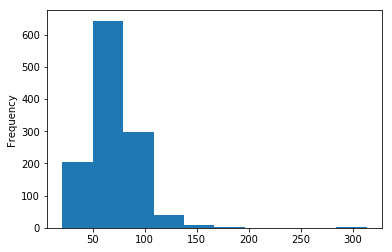

In [30]:
#This step is usually not required
h_train_num_col_filtered["LotFrontage"].plot(kind="hist")

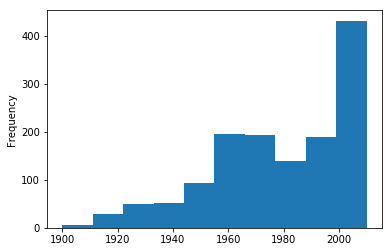

In [31]:
#This step is usually not required
h_train_num_col_filtered["GarageYrBlt"].plot(kind="hist")

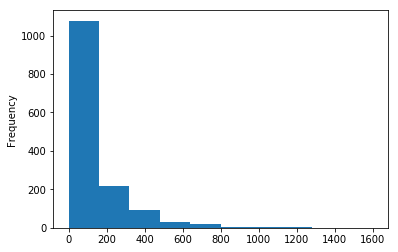

In [32]:
#This step is usually not required
h_train_num_col_filtered["MasVnrArea"].plot(kind="hist")

In [33]:
h_train_num_col_filtered[h_train_num_col_filtered["MasVnrArea"]==0]
# Displays the rows which has 0 value

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
1,80.0,6,1976,1976,0.0,978,1262,1262,0,1262,2,6,1,1976.0,2,460,298,0,181500
3,60.0,7,1915,1970,0.0,216,756,961,756,1717,1,7,1,1998.0,3,642,0,35,140000
5,85.0,5,1993,1995,0.0,732,796,796,566,1362,1,5,0,1993.0,2,480,40,30,143000
8,51.0,7,1931,1950,0.0,0,952,1022,752,1774,2,8,2,1931.0,2,468,90,0,129900
9,50.0,5,1939,1950,0.0,851,991,1077,0,1077,1,5,2,1939.0,1,205,0,4,118000
10,70.0,5,1965,1965,0.0,906,1040,1040,0,1040,1,5,0,1965.0,1,384,0,0,129500
12,NaN,5,1962,1962,0.0,737,912,912,0,912,1,4,0,1962.0,1,352,140,0,144000
15,51.0,7,1929,2001,0.0,0,832,854,0,854,1,5,0,1991.0,2,576,48,112,132000
17,72.0,4,1967,1967,0.0,0,0,1296,0,1296,2,6,0,1967.0,2,516,0,0,90000
18,66.0,5,2004,2004,0.0,646,1114,1114,0,1114,1,6,0,2004.0,2,576,0,102,159000


In [34]:
for col in ["LotFrontage","GarageYrBlt","MasVnrArea"]:
    h_train_num_col_filtered[col].fillna(h_train_num_col_filtered[col].median(),inplace=True)
    # This step fills Nans with median value

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
le=LabelEncoder()
# Fro hre we start working on categoricals 

In [37]:
h_train_cat.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [38]:
(h_train_cat.isnull().sum().sort_values(ascending=False))
#To find out NaNs in the categoricals

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
GarageCond         81
GarageQual         81
GarageFinish       81
GarageType         81
BsmtFinType2       38
BsmtExposure       38
BsmtFinType1       37
BsmtQual           37
BsmtCond           37
MasVnrType          8
Electrical          1
Condition2          0
Condition1          0
Neighborhood        0
LandSlope           0
BldgType            0
LandContour         0
LotConfig           0
Utilities           0
RoofStyle           0
LotShape            0
Street              0
HouseStyle          0
SaleCondition       0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
ExterQual           0
ExterCond           0
Foundation          0
SaleType            0
Heating             0
HeatingQC           0
CentralAir          0
KitchenQual         0
Functional          0
PavedDrive          0
MSZoning            0
dtype: int64

In [39]:
for col in ["PoolQC","MiscFeature","Alley","Fence","FireplaceQu"]:
    h_train_cat[col].fillna('No Value',inplace=True)
# Here we are filling NaNs in "PoolQC","MiscFeature","Alley","Fence","FireplaceQu" with No Value

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [40]:
for col in ["GarageCond","GarageQual","GarageFinish","GarageType","BsmtFinType2","BsmtExposure","BsmtFinType1","BsmtQual","BsmtCond","MasVnrType","Electrical"]:
    h_train_cat[col].fillna(h_train_cat[col].value_counts().idxmax(),inplace=True)
    # This step is to fill the NaNs with Mode values of that particular column

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [41]:
h_train_cat


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,No Value,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,No Value,No Value,No Value,WD,Normal
1,RL,Pave,No Value,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,No Value,No Value,No Value,WD,Normal
2,RL,Pave,No Value,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,No Value,No Value,No Value,WD,Normal
3,RL,Pave,No Value,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,No Value,No Value,No Value,WD,Abnorml
4,RL,Pave,No Value,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,No Value,No Value,No Value,WD,Normal
5,RL,Pave,No Value,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,Attchd,Unf,TA,TA,Y,No Value,MnPrv,Shed,WD,Normal
6,RL,Pave,No Value,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,...,Attchd,RFn,TA,TA,Y,No Value,No Value,No Value,WD,Normal
7,RL,Pave,No Value,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,...,Attchd,RFn,TA,TA,Y,No Value,No Value,Shed,WD,Normal
8,RM,Pave,No Value,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,...,Detchd,Unf,Fa,TA,Y,No Value,No Value,No Value,WD,Abnorml
9,RL,Pave,No Value,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,...,Attchd,RFn,Gd,TA,Y,No Value,No Value,No Value,WD,Normal


In [42]:
h_train_cat1=h_train_cat.apply(le.fit_transform)
# This steps encodes the words with a code(numerical)

In [43]:
h_train_cat1

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,3,1,1,3,3,0,4,0,5,2,...,1,1,4,4,2,3,4,1,8,4
1,3,1,1,3,3,0,2,0,24,1,...,1,1,4,4,2,3,4,1,8,4
2,3,1,1,0,3,0,4,0,5,2,...,1,1,4,4,2,3,4,1,8,4
3,3,1,1,0,3,0,0,0,6,2,...,5,2,4,4,2,3,4,1,8,0
4,3,1,1,0,3,0,2,0,15,2,...,1,1,4,4,2,3,4,1,8,4
5,3,1,1,0,3,0,4,0,11,2,...,1,2,4,4,2,3,2,3,8,4
6,3,1,1,3,3,0,4,0,21,2,...,1,1,4,4,2,3,4,1,8,4
7,3,1,1,0,3,0,0,0,14,4,...,1,1,4,4,2,3,4,3,8,4
8,4,1,1,3,3,0,4,0,17,0,...,5,2,1,4,2,3,4,1,8,0
9,3,1,1,3,3,0,0,0,3,0,...,1,1,2,4,2,3,4,1,8,4


In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
Linreg=LinearRegression()

In [46]:
housetraindf1=pd.concat([h_train_num_col_filtered,h_train_cat1],axis=1)
# This step is to combine/concat numericals and categoricals

In [47]:
housetraindf1

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,65.0,7,2003,2003,196.0,706,856,856,854,1710,...,1,1,4,4,2,3,4,1,8,4
1,80.0,6,1976,1976,0.0,978,1262,1262,0,1262,...,1,1,4,4,2,3,4,1,8,4
2,68.0,7,2001,2002,162.0,486,920,920,866,1786,...,1,1,4,4,2,3,4,1,8,4
3,60.0,7,1915,1970,0.0,216,756,961,756,1717,...,5,2,4,4,2,3,4,1,8,0
4,84.0,8,2000,2000,350.0,655,1145,1145,1053,2198,...,1,1,4,4,2,3,4,1,8,4
5,85.0,5,1993,1995,0.0,732,796,796,566,1362,...,1,2,4,4,2,3,2,3,8,4
6,75.0,8,2004,2005,186.0,1369,1686,1694,0,1694,...,1,1,4,4,2,3,4,1,8,4
7,69.0,7,1973,1973,240.0,859,1107,1107,983,2090,...,1,1,4,4,2,3,4,3,8,4
8,51.0,7,1931,1950,0.0,0,952,1022,752,1774,...,5,2,1,4,2,3,4,1,8,0
9,50.0,5,1939,1950,0.0,851,991,1077,0,1077,...,1,1,2,4,2,3,4,1,8,4


In [48]:
X1=housetraindf1.drop(["SalePrice"],axis=1)
# Here we are removing Sales price from the data frame

In [49]:
y=housetraindf1["SalePrice"]
#Sales Price is assigned to y

In [50]:
LinRegmodel=Linreg.fit(X1,y)

In [51]:
LinRegmodel.score(X1,y)

0.8424499336608553

In [52]:
h_train_cat1.shape

(1460, 43)

In [53]:
housetraindf1.shape

(1460, 62)

In [55]:
h_train_num_col_filtered.columns

Index(['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice'],
      dtype='object')

In [56]:
h_train_cat1.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')